In [1]:
import numpy as np
import scipy 
import random
import math
import csv
from scipy.stats import poisson 
from scipy.integrate import quad
import sklearn.metrics.pairwise as sk
import tensorflow as tf
import tensorflow_probability as tfp
from scipy.spatial import distance
from matplotlib import pyplot as plt
import sklearn.gaussian_process.kernels as kern
import scipy.io
from tabulate import _table_formats, tabulate
import seaborn as sns  # for nicer graphics
import warnings
import nbimporter
import Performance_metrics as metrics
warnings.simplefilter(action='ignore', category=FutureWarning)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Importing Jupyter notebook from Performance_metrics.ipynb


# ----------------------------------- Function 1---------------------------------------

In [3]:
num_realisation = 1
tau_max = 50.
folder = '../Data/synthetic_experiments/'
num_samples = 10

## Import data and prediction- Function 1

In [8]:
## Events for different realisations
events_list = np.load('../Data/synthetic_experiments/training_datasets/events_list_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
intensities = np.load('../Data/synthetic_experiments/sample_intensity_MTSM_1.npy', allow_pickle=True,  encoding='latin1')


## To compute perfomances
pred_mean_MTSM = np.load('../Data/synthetic_experiments/pred_mean_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
pred_var_MTSM = np.load('../Data/synthetic_experiments/pred_var_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
latent_means = np.load('../Data/synthetic_experiments/latent_means_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
latent_vars = np.load('../Data/synthetic_experiments/latent_variances_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
alpha_final = np.load('../Data/synthetic_experiments/alpha_final_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
beta_final = np.load('../Data/synthetic_experiments/beta_final_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
samples_latent_function = np.load('../Data/synthetic_experiments/samples_latent_function_MTSM_1.npy', allow_pickle=True,  encoding='latin1')

time_interations = np.load('../Data/synthetic_experiments/time_iterations_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
time_to_train_list_1 = np.load('../Data/synthetic_experiments/time_to_train_list_MTSM_1.npy', allow_pickle=True,  encoding='latin1')


## To assess convergence
nelbo = np.load('../Data/synthetic_experiments/nelbo_values_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
cross_entropy_U = np.load('../Data/synthetic_experiments/crossent_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
entropy_U = np.load('../Data/synthetic_experiments/ent_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
entropy_locations = np.load('../Data/synthetic_experiments/ent_x_m_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
ell = np.load('../Data/synthetic_experiments/ell_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
value_for_events_locations_vector = np.load('../Data/synthetic_experiments/value_for_events_locations_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
value_for_thinned_events_vector = np.load('../Data/synthetic_experiments/value_for_thinned_events_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')

probabilities_mixture_vector = np.load('../Data/synthetic_experiments/probabilities_mixture_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
means_mixture_vector = np.load('../Data/synthetic_experiments/means_mixture_vector_MTSM_1.npy', allow_pickle=True,  encoding='latin1')
variances_mixture_vector = np.load('../Data/synthetic_experiments/variances_mixture_vector_MTSM_1.npy')
value_expectation_vector = np.load('../Data/synthetic_experiments/value_expectation_vector_MTSM_1.npy')
kl_lambda_max_vector = np.load('../Data/synthetic_experiments/kl_lambda_max_vector_MTSM_1.npy')


In [30]:
## Discretise data for standard LGCP
discrete_output_matrix1 = np.zeros((50,num_realisation))
for p in range(num_realisation):
    binned_count = np.histogram(events_list[p], bins=50, range=(0,50)) 
    discrete_output_matrix1[:,p] = binned_count[0]
    discrete_inputs1 = (binned_count[1] + 0.5)[:-1]

true_number_events1 = np.sum(discrete_output_matrix1, axis =0)

## Import test data

In [12]:
test_data1 = np.loadtxt('../Data/synthetic_experiments/test_function1/test1.txt')
test_data2 = np.loadtxt('../Data/synthetic_experiments/test_function1/test2.txt')
test_data3 = np.loadtxt('../Data/synthetic_experiments/test_function1/test3.txt')
test_data4 = np.loadtxt('../Data/synthetic_experiments/test_function1/test4.txt')
test_data5 = np.loadtxt('../Data/synthetic_experiments/test_function1/test5.txt')
test_data6 = np.loadtxt('../Data/synthetic_experiments/test_function1/test6.txt')
test_data7 = np.loadtxt('../Data/synthetic_experiments/test_function1/test7.txt')
test_data8 = np.loadtxt('../Data/synthetic_experiments/test_function1/test8.txt')
test_data9 = np.loadtxt('../Data/synthetic_experiments/test_function1/test9.txt')
test_data10 = np.loadtxt('../Data/synthetic_experiments/test_function1/test10.txt')
test_data_list = [None]*10
test_data_list[0] = test_data1
test_data_list[1] = test_data2
test_data_list[2] = test_data3
test_data_list[3] = test_data4
test_data_list[4] = test_data5
test_data_list[5] = test_data6
test_data_list[6] = test_data7
test_data_list[7] = test_data8
test_data_list[8] = test_data9
test_data_list[9] = test_data10

## Performances

In [13]:
## Compute L2
x_test = np.linspace(0.0, 50.0, num=50)
function1 = 2.*np.exp(-x_test/15.) + np.exp(-((x_test-25.)/10.)**2)
num_samples = 100

In [14]:
mse_vector_1 = metrics.compute_l_2(num_realisation, pred_mean_MTSM, function1, x_test)
print('Mean L2', np.mean(mse_vector_1))

Mean L2 20.576485859355707


In [15]:
log_prob_tensor_1 = metrics.compute_lp(num_realisation, x_test, test_data_list, 'sigmoidal',
                                     latent_means, latent_vars, alpha_final, beta_final)
print('Mean lp', np.mean(log_prob_tensor_1))
# print('Mean lp', log_prob_tensor)

Mean lp -380.097436161633


In [16]:
Q_2_1 = metrics.compute_Q2(num_realisation, pred_mean_MTSM, function1)
print('Q_2', np.mean(Q_2_1))

Q_2 -0.4578890784127809


In [17]:
coverage_1, coverage_1_std, count_matrix_1 = metrics.compute_coverage_insample(num_realisation, num_samples, discrete_output_matrix1, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', alpha = alpha_final, beta = beta_final)
print('coverage', coverage_1)



coverage 1.0


In [18]:
coverage_out_of_sample_1, _ = metrics.compute_coverage_out_sample(num_realisation, num_samples, discrete_output_matrix1, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', alpha = alpha_final, beta = beta_final)
print('coverage out of sample', coverage_out_of_sample_1)


coverage out of sample 1.0


In [19]:
nlpl_1, nlpl_1_var = metrics.compute_nlpl(x_test, num_realisation, latent_means, latent_vars, 
             test_data_list, 'sigmoidal', num_samples = num_samples, alpha = alpha_final, beta = beta_final)
print('nlpl', np.mean(nlpl_1))


nlpl 17.4540380082235


In [20]:
level = np.array([10,20,30,40,50])
coverage_matrix_train_1 = np.zeros((level.shape[0],1))
coverage_matrix_train_1_std = np.zeros((level.shape[0],1))
coverage_matrix_test_1 = np.zeros((level.shape[0],1))
coverage_matrix_test_1_std = np.zeros((level.shape[0],1))
for i in range(level.shape[0]):
    coverage_matrix_train_1[i], coverage_matrix_train_1_std[i], _ = metrics.compute_coverage_insample(num_realisation, num_samples, discrete_output_matrix1, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', 
                alpha = alpha_final, beta = beta_final, credible_interval = level[i])
    coverage_matrix_test_1[i], coverage_matrix_test_1_std[i] = metrics.compute_coverage_out_sample(num_realisation, num_samples, discrete_output_matrix1, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', 
                alpha = alpha_final, beta = beta_final, credible_interval = level[i])
    
        

In [21]:
print('train',coverage_matrix_train_1)
print('test',coverage_matrix_test_1_std)

train [[1.]
 [1.]
 [0.]
 [0.]
 [0.]]
test [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Plots

### Plots mean intensities

In [26]:
##### Plot the true intensities and the estimated one for every point process realisation
length=6
width=4
markersize = 5
trans_point = 0.3
trans_line = 0.9
col_true = 'dimgrey'
col_mt = 'red'
col_mt_gp = 'green'
style_gp = '--'
col_st = 'green'
style_st = '--'
col_pooling = "darkviolet"
col_dots = 'black'
col_icm = 'blue'
style_icm = '--'
lenght_interval = 2
style_arrow = '|-|'
style_data = 'o'
face_color= 'none'
color_interval = 'orange'
color_events = 'black'
color_our = 'red'
color_adams = 'green'
color_donner = 'blue'
color_lloyds = 'orange'
color_lgcp = 'magenta'

font = {'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

No handles with labels found to put in legend.


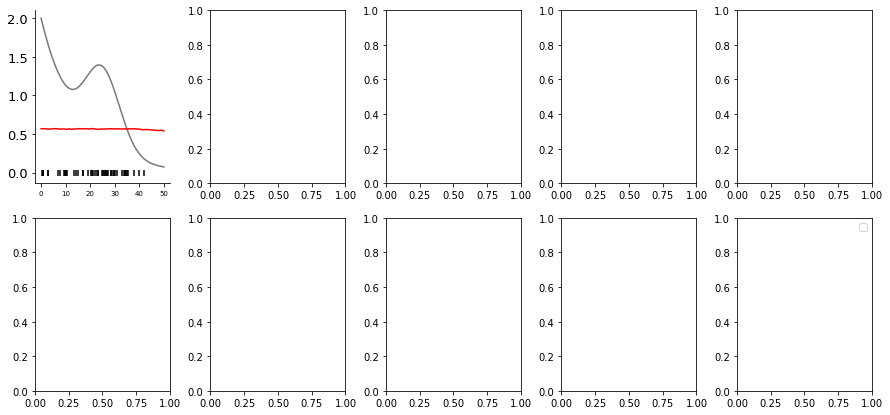

In [27]:
num_realisation = 1
f, axes = plt.subplots(2, 5)
f.set_figheight(7)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.20)
f.subplots_adjust(wspace=0.3)
for p in range(num_realisation):
    ax = axes.flat[p]
    ax.xaxis.set_visible(True)
    ax.tick_params(labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=13)
    ax.tick_params(axis='x', labelsize=7)
    ## True intensity
    ax.plot(np.linspace(0.0, tau_max, num=200)[:,np.newaxis], intensities[0,:,0], '-', mew=2, color = col_true, markersize=4, alpha=trans_line, label = 'GT')
    
    ## Predictions
    ax.scatter(events_list[p], np.repeat(0.,events_list[p].shape[0]), color = color_events, 
               marker = '|', label = 'Events')
    
    ax.plot(np.linspace(0.0, tau_max, num=50)[:,np.newaxis], pred_mean_MTSM[p], color = color_our, 
            label = 'OUR')
        

plt.legend()

plt.show()

### Plot posterior count distribution

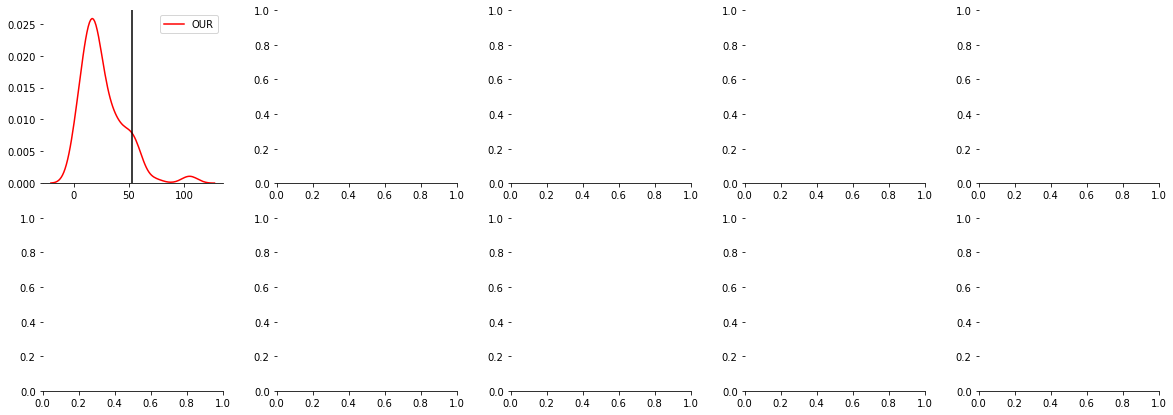

In [31]:
f, axes = plt.subplots(2, 5)
#, sharex=True
f.set_figheight(7)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.20)
f.subplots_adjust(wspace=0.3)
sns.despine(left=True)

for p in range(num_realisation):
#for ax in axes.flat:
    ax = axes.flat[p]
    #plt.hist(count_matrix[:,0],bins = 20, histtype='barstacked')
    sns.kdeplot(count_matrix_1[:,p], ax=ax, color = color_our, label = 'OUR')
    #sns.kdeplot(Lloyds_count_matrix_1[:,p], ax=ax, color = color_lloyds, label = 'Lloyds')
    ax.axvline(x=true_number_events1[p], color = 'black')


### Save variables for future aggregate plot

In [32]:
intensities_1 = intensities
events_list_1 = events_list
pred_mean_MTSM_1 = pred_mean_MTSM
pred_var_MTSM_1 = pred_var_MTSM

# ----------------------------------- Function 2---------------------------------------


In [34]:
num_realisation = 1
epochs = 500
tau_max = 5
inputs = np.linspace(0., tau_max, num=200)[:, np.newaxis]
folder = '../Data/synthetic_experiments/'

## Import data and prediction - Function 2

In [35]:
## Events for different realisations 
events_list = np.load('../Data/synthetic_experiments/training_datasets/events_list_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
intensities = np.load('../Data/synthetic_experiments/sample_intensity_MTSM_2.npy', allow_pickle=True,  encoding='latin1')

## To compute perfomances
pred_mean_MTSM = np.load('../Data/synthetic_experiments/pred_mean_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
pred_var_MTSM = np.load('../Data/synthetic_experiments/pred_var_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
latent_means = np.load('../Data/synthetic_experiments/latent_means_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
latent_vars = np.load('../Data/synthetic_experiments/latent_variances_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
alpha_final = np.load('../Data/synthetic_experiments/alpha_final_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
beta_final = np.load('../Data/synthetic_experiments/beta_final_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
samples_latent_function = np.load('../Data/synthetic_experiments/samples_latent_function_MTSM_2.npy', allow_pickle=True,  encoding='latin1')

time_interations = np.load('../Data/synthetic_experiments/time_iterations_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
time_to_train_list_2 = np.load('../Data/synthetic_experiments/time_to_train_list_MTSM_2.npy', allow_pickle=True,  encoding='latin1')

## To assess convergence
nelbo = np.load('../Data/synthetic_experiments/nelbo_values_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
cross_entropy_U = np.load('../Data/synthetic_experiments/crossent_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
entropy_U = np.load('../Data/synthetic_experiments/ent_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
entropy_locations = np.load('../Data/synthetic_experiments/ent_x_m_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
ell = np.load('../Data/synthetic_experiments/ell_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
value_for_events_locations_vector = np.load('../Data/synthetic_experiments/value_for_events_locations_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
value_for_thinned_events_vector = np.load('../Data/synthetic_experiments/value_for_thinned_events_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')

probabilities_mixture_vector = np.load('../Data/synthetic_experiments/probabilities_mixture_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
means_mixture_vector = np.load('../Data/synthetic_experiments/means_mixture_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
variances_mixture_vector = np.load('../Data/synthetic_experiments/variances_mixture_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
value_expectation_vector = np.load('../Data/synthetic_experiments/value_expectation_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')
kl_lambda_max_vector = np.load('../Data/synthetic_experiments/kl_lambda_max_vector_MTSM_2.npy', allow_pickle=True,  encoding='latin1')

In [52]:
## Discretise data for standard LGCP
discrete_output_matrix2 = np.zeros(((tau_max*2),num_realisation))
for p in range(num_realisation):
    binned_count = np.histogram(events_list[p], bins=(tau_max*2), range=(0,tau_max)) 
    discrete_output_matrix2[:,p] = binned_count[0]
    discrete_inputs2 = (binned_count[1] + 0.25)[:-1]
true_number_events2 = np.sum(discrete_output_matrix2, axis =0)


## Import test data

In [37]:
## Import test data
test_data1 = np.loadtxt('../Data/synthetic_experiments/test_function2/test21.txt')
test_data2 = np.loadtxt('../Data/synthetic_experiments/test_function2/test22.txt')
test_data3 = np.loadtxt('../Data/synthetic_experiments/test_function2/test23.txt')
test_data4 = np.loadtxt('../Data/synthetic_experiments/test_function2/test24.txt')
test_data5 = np.loadtxt('../Data/synthetic_experiments/test_function2/test25.txt')
test_data6 = np.loadtxt('../Data/synthetic_experiments/test_function2/test26.txt')
test_data7 = np.loadtxt('../Data/synthetic_experiments/test_function2/test27.txt')
test_data8 = np.loadtxt('../Data/synthetic_experiments/test_function2/test28.txt')
test_data9 = np.loadtxt('../Data/synthetic_experiments/test_function2/test29.txt')
test_data10 = np.loadtxt('../Data/synthetic_experiments/test_function2/test210.txt')
test_data_list = [None]*10
test_data_list[0] = test_data1
test_data_list[1] = test_data2
test_data_list[2] = test_data3
test_data_list[3] = test_data4
test_data_list[4] = test_data5
test_data_list[5] = test_data6
test_data_list[6] = test_data7
test_data_list[7] = test_data8
test_data_list[8] = test_data9
test_data_list[9] = test_data10

## Performances

In [38]:
## Compute L2
x_test = np.linspace(0.0, 5.0, num=50)
function2 = 5.*np.sin(x_test**2) + 6
num_samples = 100

In [39]:
mse_vector_2 = metrics.compute_l_2(num_realisation, pred_mean_MTSM, function2, x_test)
print('Mean L2', np.mean(mse_vector_2))

Mean L2 233.09369485019852


In [40]:
log_prob_tensor_2 = metrics.compute_lp(num_realisation, x_test, test_data_list, 'sigmoidal',
                                     latent_means, latent_vars, alpha_final, beta_final)
print('Mean lp', np.mean(log_prob_tensor_2))
# print('Mean lp', log_prob_tensor)

Mean lp -271.4337351506421


In [41]:
# Time per epoch
# print('time per epoch', time_interations)
# print('time full train', time_to_train_list)

In [42]:
Q_2_2 = metrics.compute_Q2(num_realisation, pred_mean_MTSM, function2)
print('Q_2', np.mean(Q_2_2))

Q_2 -3.231255160648205


In [43]:
coverage_2, coverage_2_std, count_matrix_2 = metrics.compute_coverage_insample(num_realisation, num_samples, discrete_output_matrix2, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', alpha = alpha_final, beta = beta_final)
print('coverage', coverage_2)



coverage 0.0


In [44]:
coverage_out_of_sample_2 = metrics.compute_coverage_out_sample(num_realisation, num_samples, discrete_output_matrix2, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', alpha = alpha_final, beta = beta_final)
print('coverage', coverage_out_of_sample_2)



coverage (0.0, 0.0)


In [45]:
level = np.array([10,20,30,40,50])
coverage_matrix_train_2 = np.zeros((level.shape[0],1))
coverage_matrix_train_2_std = np.zeros((level.shape[0],1))
coverage_matrix_test_2 = np.zeros((level.shape[0],1))
coverage_matrix_test_2_std = np.zeros((level.shape[0],1))
for i in range(level.shape[0]):
    coverage_matrix_train_2[i], coverage_matrix_train_2_std[i], _ = metrics.compute_coverage_insample(num_realisation, num_samples, discrete_output_matrix2, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', 
                alpha = alpha_final, beta = beta_final, credible_interval = level[i])
    coverage_matrix_test_2[i], coverage_matrix_test_2_std[i] = metrics.compute_coverage_out_sample(num_realisation, num_samples, discrete_output_matrix2, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', 
                alpha = alpha_final, beta = beta_final, credible_interval = level[i])
    
print('coverage_matrix_train_2',coverage_matrix_train_2)
print('coverage_matrix_test_2',coverage_matrix_test_2_std)



coverage_matrix_train_2 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
coverage_matrix_test_2 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [46]:
nlpl_2, _ = metrics.compute_nlpl(x_test, num_realisation, latent_means, latent_vars, 
             test_data_list, 'sigmoidal', num_samples, alpha_final, beta_final)
print('nlpl', np.mean(nlpl_2))

nlpl 63.50259930664163


## Plots

### Plot mean intensities

In [47]:
##### Plot true intensities and estimated intensities 
length=6
width=4
markersize = 5
trans_point = 0.3
trans_line = 0.9
col_true = 'dimgrey'
col_mt = 'red'
col_mt_gp = 'green'
style_gp = '--'
col_st = 'green'
style_st = '--'
col_pooling = "darkviolet"
col_dots = 'black'
col_icm = 'blue'
style_icm = '--'
lenght_interval = 2
style_arrow = '|-|'
style_data = 'o'
face_color= 'none'
color_interval = 'orange'
color_events = 'black'
color_our = 'red'
color_adams = 'green'
color_donner = 'blue'
color_lloyds = 'orange'
color_lgcp = 'magenta'


font = {'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

No handles with labels found to put in legend.


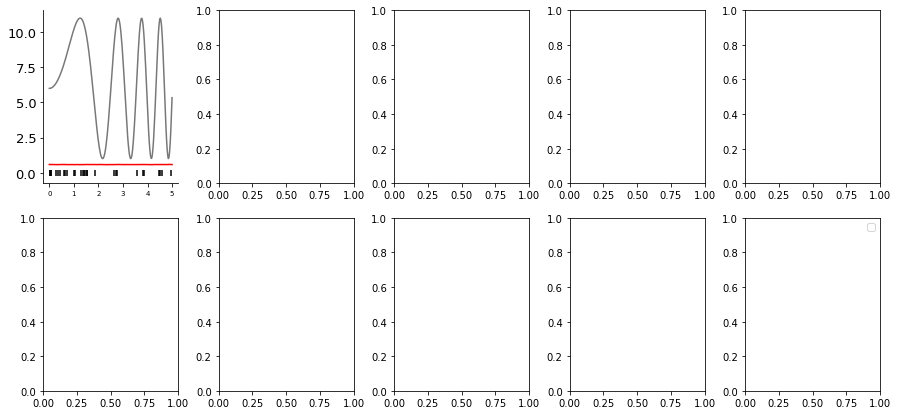

In [48]:
f, axes = plt.subplots(2, 5)
f.set_figheight(7)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.20)
f.subplots_adjust(wspace=0.3)
for p in range(num_realisation):
#for ax in axes.flat:
    ax = axes.flat[p]
    ax.xaxis.set_visible(True)
    ax.tick_params(labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=13)
    ax.tick_params(axis='x', labelsize=7)
    ## True intensity
    ax.plot(inputs, intensities[0,:,0], '-', mew=2, color = col_true, markersize=4, alpha=trans_line, label = 'GT')
    
    ## Predictions
    ax.scatter(events_list[p], np.repeat(0.,events_list[p].shape[0]), color = color_events, 
               marker = '|', label = 'Events')
    
    ax.plot(np.linspace(0.0, tau_max, num=50)[:,np.newaxis], pred_mean_MTSM[p], color = color_our, 
            label = 'OUR')
    
    
plt.legend()

plt.show()

### Plot posterior count distributions

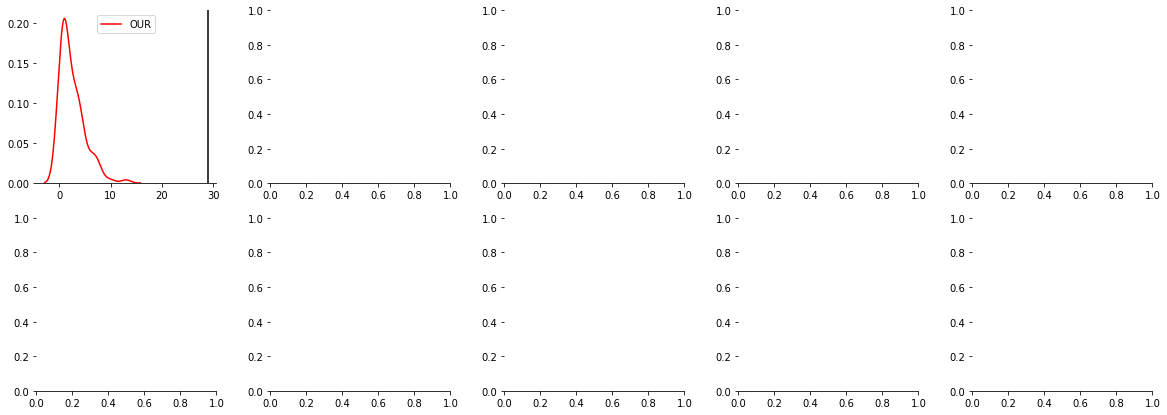

In [54]:
f, axes = plt.subplots(2, 5)
#, sharex=True
f.set_figheight(7)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.20)
f.subplots_adjust(wspace=0.3)
sns.despine(left=True)

for p in range(num_realisation):
#for ax in axes.flat:
    ax = axes.flat[p]
    #plt.hist(count_matrix[:,0],bins = 20, histtype='barstacked')
    sns.kdeplot(count_matrix_2[:,p], ax=ax, color = color_our, label = 'OUR')
    ax.axvline(x=true_number_events2[p], color = 'black')


## Latex Table

### Save variables for aggregate plotting

In [55]:
intensities_2 = intensities
events_list_2 = events_list
pred_mean_MTSM_2 = pred_mean_MTSM
pred_var_MTSM_2 = pred_var_MTSM

# ----------------------------------- Function 3---------------------------------------


In [56]:
num_realisation = 1
tau_max = 100
inputs = np.linspace(0., tau_max, num=200)[:, np.newaxis]
folder = '../Data/synthetic_experiments/'

## Import data and prediction - Function 3

In [57]:
## Events for different realisations 
events_list = np.load('../Data/synthetic_experiments/training_datasets/events_list_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
intensities = np.load('../Data/synthetic_experiments/sample_intensity_MTSM_3.npy', allow_pickle=True,  encoding='latin1')

## To compute perfomances
pred_mean_MTSM = np.load('../Data/synthetic_experiments/pred_mean_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
pred_var_MTSM = np.load('../Data/synthetic_experiments/pred_var_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
latent_means = np.load('../Data/synthetic_experiments/latent_means_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
latent_vars = np.load('../Data/synthetic_experiments/latent_variances_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
alpha_final = np.load('../Data/synthetic_experiments/alpha_final_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
beta_final = np.load('../Data/synthetic_experiments/beta_final_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
samples_latent_function = np.load('../Data/synthetic_experiments/samples_latent_function_MTSM_3.npy', allow_pickle=True,  encoding='latin1')

time_interations = np.load('../Data/synthetic_experiments/time_iterations_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
time_to_train_list_3 = np.load('../Data/synthetic_experiments/time_to_train_list_MTSM_3.npy', allow_pickle=True,  encoding='latin1')

## To assess convergence
nelbo = np.load('../Data/synthetic_experiments/nelbo_values_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
cross_entropy_U = np.load('../Data/synthetic_experiments/crossent_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
entropy_U = np.load('../Data/synthetic_experiments/ent_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
entropy_locations = np.load('../Data/synthetic_experiments/ent_x_m_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
ell = np.load('../Data/synthetic_experiments/ell_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
value_for_events_locations_vector = np.load('../Data/synthetic_experiments/value_for_events_locations_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
value_for_thinned_events_vector = np.load('../Data/synthetic_experiments/value_for_thinned_events_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')

probabilities_mixture_vector = np.load('../Data/synthetic_experiments/probabilities_mixture_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
means_mixture_vector = np.load('../Data/synthetic_experiments/means_mixture_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
variances_mixture_vector = np.load('../Data/synthetic_experiments/variances_mixture_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
value_expectation_vector = np.load('../Data/synthetic_experiments/value_expectation_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')
kl_lambda_max_vector = np.load('../Data/synthetic_experiments/kl_lambda_max_vector_MTSM_3.npy', allow_pickle=True,  encoding='latin1')

In [59]:
## Discretise data for standard LGCP
discrete_output_matrix3 = np.zeros(((tau_max),num_realisation))
for p in range(num_realisation):
    binned_count = np.histogram(events_list[p], bins=(tau_max), range=(0,tau_max)) 
    discrete_output_matrix3[:,p] = binned_count[0]
    discrete_inputs3 = (binned_count[1] + 0.5)[:-1]
true_number_events3 = np.sum(discrete_output_matrix3, axis =0)


## Import test data

In [60]:
test_data1 = np.loadtxt('../Data/synthetic_experiments/test_function3/test31.txt')
test_data2 = np.loadtxt('../Data/synthetic_experiments/test_function3/test32.txt')
test_data3 = np.loadtxt('../Data/synthetic_experiments/test_function3/test33.txt')
test_data4 = np.loadtxt('../Data/synthetic_experiments/test_function3/test34.txt')
test_data5 = np.loadtxt('../Data/synthetic_experiments/test_function3/test35.txt')
test_data6 = np.loadtxt('../Data/synthetic_experiments/test_function3/test36.txt')
test_data7 = np.loadtxt('../Data/synthetic_experiments/test_function3/test37.txt')
test_data8 = np.loadtxt('../Data/synthetic_experiments/test_function3/test38.txt')
test_data9 = np.loadtxt('../Data/synthetic_experiments/test_function3/test39.txt')
test_data10 = np.loadtxt('../Data/synthetic_experiments/test_function3/test310.txt')
test_data_list = [None]*10
test_data_list[0] = test_data1
test_data_list[1] = test_data2
test_data_list[2] = test_data3
test_data_list[3] = test_data4
test_data_list[4] = test_data5
test_data_list[5] = test_data6
test_data_list[6] = test_data7
test_data_list[7] = test_data8
test_data_list[8] = test_data9
test_data_list[9] = test_data10

##  Performances

In [61]:
x_test = np.linspace(0.0, 100.0, num=50)
x_interpolate = np.array((0, 25, 50, 75, 100))
y_interpolate = np.array((2, 3, 1, 2.5, 3))
function3 = np.interp(x_test, x_interpolate, y_interpolate)
num_samples =1000

In [62]:
mse_vector_3 = metrics.compute_l_2(num_realisation, pred_mean_MTSM, function3, x_test)
print('Mean L2', np.mean(mse_vector_3))

Mean L2 310.1994003732401


In [63]:
log_prob_tensor_3 = metrics.compute_lp(num_realisation, x_test, test_data_list, 'sigmoidal',
                                     latent_means, latent_vars, alpha_final, beta_final)
print('Mean lp', np.mean(log_prob_tensor_3))
# print('Mean lp', log_prob_tensor)

Mean lp -1782.119246550749


In [64]:
Q_2_3 = metrics.compute_Q2(num_realisation, pred_mean_MTSM, function3)
print('Q_2', np.mean(Q_2_3))

Q_2 -8.996565812945088


In [65]:
coverage_3,coverage_3_std, count_matrix_3 = metrics.compute_coverage_insample(num_realisation, num_samples, discrete_output_matrix3, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', alpha = alpha_final, beta = beta_final)
print('coverage', coverage_3)



coverage 0.0


In [66]:
coverage_out_of_sample_3 = metrics.compute_coverage_out_sample(num_realisation, num_samples, discrete_output_matrix3, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', alpha = alpha_final, beta = beta_final)
print('coverage', coverage_out_of_sample_3)


coverage (0.0, 0.0)


In [67]:
nlpl_3, _ = metrics.compute_nlpl(x_test, num_realisation, latent_means, latent_vars, 
             test_data_list, 'sigmoidal', num_samples,  alpha_final, beta_final)
print('nlpl', np.mean(nlpl_3))

nlpl 195.91458432166974


In [68]:
level = np.array([10,20,30,40,50])
coverage_matrix_train_3 = np.zeros((level.shape[0],1))
coverage_matrix_train_3_std = np.zeros((level.shape[0],1))
coverage_matrix_test_3 = np.zeros((level.shape[0],1))
coverage_matrix_test_3_std = np.zeros((level.shape[0],1))
for i in range(level.shape[0]):
    coverage_matrix_train_3[i], coverage_matrix_train_3_std[i], _ = metrics.compute_coverage_insample(num_realisation, num_samples, discrete_output_matrix3, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', 
                alpha = alpha_final, beta = beta_final, credible_interval = level[i])
    coverage_matrix_test_3[i], coverage_matrix_test_3_std[i] = metrics.compute_coverage_out_sample(num_realisation, num_samples, discrete_output_matrix3, x_test, 
                    latent_means, latent_vars, test_data_list, 'sigmoidal', 
                alpha = alpha_final, beta = beta_final, credible_interval = level[i])
    
        

In [69]:
print('coverage_matrix_train_3',coverage_matrix_train_3)
print('coverage_matrix_test_3',coverage_matrix_test_3_std)


coverage_matrix_train_3 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
coverage_matrix_test_3 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Plots

### Plot mean intensities

In [70]:
tau_max = 100

In [71]:
##### Figure 1 - Normal prior
length=6
width=4
markersize = 5
trans_point = 0.3
trans_line = 0.9
col_true = 'dimgrey'
col_mt = 'red'
col_mt_gp = 'green'
style_gp = '--'
col_st = 'green'
style_st = '--'
col_pooling = "darkviolet"
col_dots = 'black'
col_icm = 'blue'
style_icm = '--'
lenght_interval = 2
style_arrow = '|-|'
style_data = 'o'
face_color= 'none'
color_interval = 'orange'
color_events = 'black'
color_our = 'red'
color_adams = 'green'
color_donner = 'blue'
color_lloyds = 'orange'
color_lgcp = 'magenta'

font = {'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

No handles with labels found to put in legend.


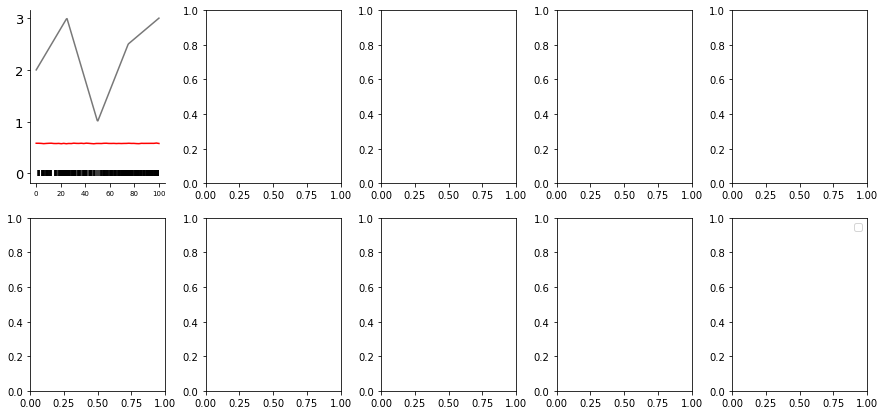

In [72]:
f, axes = plt.subplots(2, 5)
f.set_figheight(7)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.20)
f.subplots_adjust(wspace=0.3)
for p in range(num_realisation):
#for ax in axes.flat:
    ax = axes.flat[p]
    ax.xaxis.set_visible(True)
    ax.tick_params(labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=13)
    ax.tick_params(axis='x', labelsize=7)
    ## True intensity
    ax.plot(np.linspace(0.0, tau_max, num=200)[:,np.newaxis], intensities[0,:,0], '-', mew=2, color = col_true, markersize=4, alpha=trans_line, label = 'GT')
    
    ## Predictions
    ax.scatter(events_list[p], np.repeat(0.,events_list[p].shape[0]), color = color_events, 
               marker = '|', label = 'Events')
    
    ax.plot(np.linspace(0.0, tau_max, num=50)[:,np.newaxis], pred_mean_MTSM[p], color = color_our, 
            label = 'OUR')
    
    

plt.legend()

plt.show()

### Plot posterior count distribution

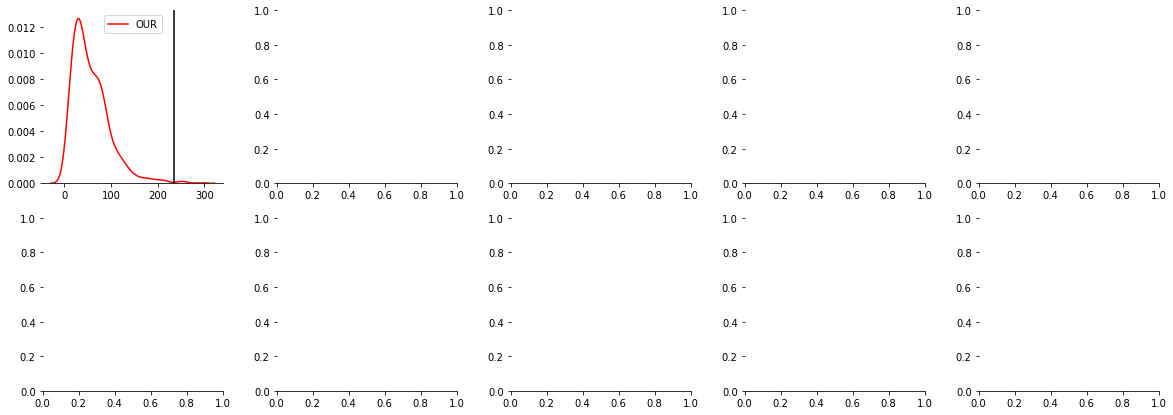

In [75]:
f, axes = plt.subplots(2, 5)
#, sharex=True
f.set_figheight(7)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.20)
f.subplots_adjust(wspace=0.3)
sns.despine(left=True)

for p in range(num_realisation):
    ax = axes.flat[p]
    sns.kdeplot(count_matrix_3[:,p], ax=ax, color = color_our, label = 'OUR')
    ax.axvline(x=true_number_events3[p], color = 'black')


### Save variables for aggregate plots

In [76]:
intensities_3 = intensities
events_list_3 = events_list
pred_mean_MTSM_3 = pred_mean_MTSM
pred_var_MTSM_3 = pred_var_MTSM

# --------------------------------Aggregate results----------------------------------



In [78]:
num_functions = 3

In [79]:
##### Aggregate predictions
length=6
width=4
markersize = 5
trans_point = 0.3
trans_line = 0.5
col_true = 'black'
col_mt = 'red'
col_mt_gp = 'green'
style_gp = '--'
col_st = 'green'
style_st = '--'
col_pooling = "darkviolet"
col_dots = 'black'
col_icm = 'blue'
style_icm = '--'
lenght_interval = 2
style_arrow = '|-|'
style_data = 'o'
face_color= 'none'
color_interval = 'orange'
color_events = 'black'
color_our = 'black'
#color_adams = 'green'
color_adams = 'blue'
#color_donner = 'blue'
color_donner = 'red'
color_lloyds = 'orange'
color_lgcp = 'magenta'

linewidth_our=3

font = {'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

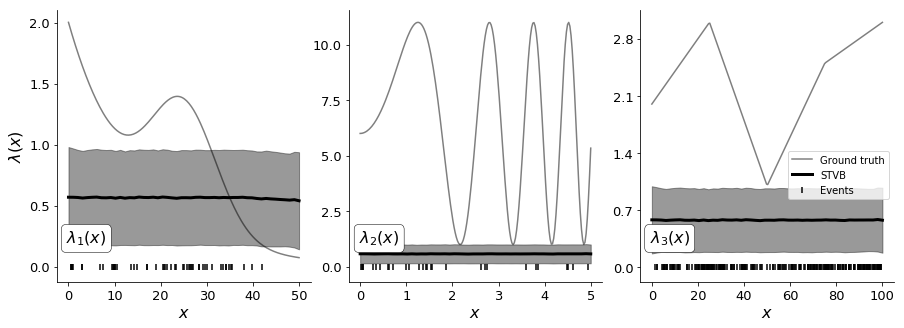

In [81]:
num_functions = 3
f, ((ax1, ax2, ax3)) = plt.subplots(1, num_functions)
f.set_figheight(5)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.20)
f.subplots_adjust(wspace=0.15)

######################################################################

########################### First function
ax1.tick_params(labelsize=11)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', labelsize=13)
ax1.tick_params(axis='x', labelsize=13)
ax1.set_yticks([0,0.5, 1,1.5, 2])

num_realisation_1 = 0

ax1.plot(np.linspace(0.0,50 , num=200)[:,np.newaxis], intensities_1[0,:,0], '-', mew=2, 
         color = col_true, markersize=4, alpha=trans_line, label = 'GT')
    
## Predictions
ax1.scatter(events_list_1[num_realisation_1], np.repeat(0.,events_list_1[num_realisation_1].shape[0]), 
            color = color_events, 
               marker = '|', label = 'Events')
    
ax1.plot(np.linspace(0.0, 50, num=50)[:,np.newaxis], pred_mean_MTSM_1[num_realisation_1], color = color_our, 
            label = 'OUR', linewidth= linewidth_our)
ax1.fill_between(np.linspace(0.0, 50, num=50), 
                    (pred_mean_MTSM_1[num_realisation_1,:,0] + np.sqrt(pred_var_MTSM_1)[num_realisation_1,:,0]),
                 (pred_mean_MTSM_1[num_realisation_1,:,0] - np.sqrt(pred_var_MTSM_1)[num_realisation_1,:,0]), 
                    color=color_our, alpha='0.4')
    
######################################################################

########################### Second function
ax2.tick_params(labelsize=11)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='y', labelsize=13)
ax2.tick_params(axis='x', labelsize=13)
ax2.set_yticks([0.0,2.5,5.0,7.5,10.0])

num_realisation_2 = 0

ax2.plot(np.linspace(0.0, 5, num=200)[:,np.newaxis], intensities_2[0,:,0], '-', mew=2, 
         color = col_true, markersize=4, alpha=trans_line, label = 'GT')
    
## Predictions
ax2.scatter(events_list_2[num_realisation_2], np.repeat(0.,events_list_2[num_realisation_2].shape[0]), 
            color = color_events, 
               marker = '|', label = 'Events')
    
ax2.plot(np.linspace(0.0, 5, num=50)[:,np.newaxis], pred_mean_MTSM_2[num_realisation_2], color = color_our, 
            label = 'OUR',linewidth= linewidth_our)
ax2.fill_between(np.linspace(0.0, 5, num=50), 
                    (pred_mean_MTSM_2[num_realisation_2,:,0] + np.sqrt(pred_var_MTSM_2)[num_realisation_2,:,0]),
                 (pred_mean_MTSM_2[num_realisation_2,:,0] - np.sqrt(pred_var_MTSM_2)[num_realisation_2,:,0]), 
                    color=color_our, alpha='0.4')


######################################################################

########################### Third function
ax3.tick_params(labelsize=1)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(axis='y', labelsize=13)
ax3.tick_params(axis='x', labelsize=13)
ax3.set_yticks([0.0,0.7,1.4,2.1, 2.8])

num_realisation_3 = 0

ax3.plot(np.linspace(0.0, 100, num=200)[:,np.newaxis], intensities_3[0,:,0], '-', mew=2, 
         color = col_true, markersize=4, alpha=trans_line, label = 'Ground truth')
    
## Predictions
ax3.scatter(events_list_3[num_realisation_3], np.repeat(0.,events_list_3[num_realisation_3].shape[0]), 
            color = color_events, 
               marker = '|', label = 'Events')
    
ax3.plot(np.linspace(0.0, 100, num=50)[:,np.newaxis], pred_mean_MTSM_3[num_realisation_3], color = color_our, 
            label = 'STVB', linewidth= linewidth_our)
ax3.fill_between(np.linspace(0.0, 100, num=50), 
                    (pred_mean_MTSM_3[num_realisation_3,:,0] + np.sqrt(pred_var_MTSM_1)[num_realisation_3,:,0]),
                 (pred_mean_MTSM_3[num_realisation_3,:,0] - np.sqrt(pred_var_MTSM_1)[num_realisation_3,:,0]), 
                    color=color_our, alpha='0.4')


######################################################################
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)


plt.text(-1.0, 0.3,r"$\lambda_3(x)$", fontdict=font,bbox=bbox_props )
plt.text(-127.0, 0.3,r"$\lambda_2(x)$", fontdict=font,bbox=bbox_props )
plt.text(-254.0, 0.3,r"$\lambda_1(x)$", fontdict=font,bbox=bbox_props )

ax1.set_xlabel(r"$x$", fontdict=font)
ax2.set_xlabel(r"$x$", fontdict=font)
ax3.set_xlabel(r"$x$", fontdict=font)
ax1.set_ylabel(r"$\lambda(x)$", fontdict=font)

###################

plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5),prop={'size': 10})

plt.show()